# Introduction

In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we’ve never had before about how different people experience romance

The purpose of this project is to practice formulating questions and implementing machine learning techniques to solve a question

**Data sources:**

`profiles.csv` was provided by Codecademy.com.

## Scoping

### Goals

In this project, the goal is to utilize the skills learned through Codecademy and apply machine learning techniques to a data set. 

The primary research question that will be answered is whether there is a link between other variables in their profiles and their religious commitment (or lack thereof).

This project is important because the data affords us a look at answers that individuals would be more motivated to be accurate and truthful in reporting about themselves, as there is a major disincentive of not being so (i.e. not finding a suitable partner)


### Data

The project has one data set provided by Codecademy called profiles.csv. In the data, each row represents an OkCupid user and the columns are the responses to their user profiles which include multi-choice and short answer questions.

### Analysis

This solution will use descriptive statistics and data visualization to find key figures in understanding the distribution, count, and relationship between variables. Since the goal of the project to make predictions on the user's religious commitment, classification algorithms from the supervised learning family of machine learning models will be implemented. 

### Evaluation

The project will conclude with the evaluation of the machine learning model selected with a validation data set. The output of the predictions can be checked through a confusion matrix, and metrics such as accuracy, precision, recall, F1 and Kappa scores. 


## Imports

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

## Loading the Data

In [2]:
profiles = pd.read_csv('profiles.csv')
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


The columns in the dataset include: 

- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations

And a set of open short-answer responses to :

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…

In [3]:
list(profiles.columns)

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

## Data Exploration

Let's look at the religions/adherence.  There are a few distinct religions, but qualifiers concerning the level of seriousness bloat the number to 45 different answers.

In [4]:
print('number of religions:', profiles.religion.nunique())
print('religions:', profiles.religion.unique())

number of religions: 45
religions: ['agnosticism and very serious about it'
 'agnosticism but not too serious about it' nan 'atheism' 'christianity'
 'christianity but not too serious about it'
 'atheism and laughing about it' 'christianity and very serious about it'
 'other' 'catholicism' 'catholicism but not too serious about it'
 'catholicism and somewhat serious about it'
 'agnosticism and somewhat serious about it'
 'catholicism and laughing about it' 'agnosticism and laughing about it'
 'agnosticism' 'atheism and somewhat serious about it'
 'buddhism but not too serious about it'
 'other but not too serious about it' 'buddhism'
 'other and laughing about it' 'judaism but not too serious about it'
 'buddhism and laughing about it' 'other and somewhat serious about it'
 'other and very serious about it' 'hinduism but not too serious about it'
 'atheism but not too serious about it' 'judaism'
 'christianity and somewhat serious about it'
 'hinduism and very serious about it' 'atheis

### Label cleanup

By extracting out the specific religion from the column, we can get the adherence qualifier that will be used for our predictions

In [5]:
def get_religion(religion_str):
    religion_map = {'unknown': -1, 'atheism': 0,'agnosticism': 1,
                   'christianity': 2, 'catholicism': 3, 'judaism': 4,
                    'buddhism': 5, 'hinduism': 6, 'islam': 7,
                   'other': 8}
    if ' ' not in religion_str:
        religion = religion_str
    else:
        religion = religion_str.split(' ',1)[0]
    return religion_map[religion]

Some of the answers for religion did not have a qualifier.  My guess is that such a generic answer falls between "not too serious" and "somewhat serious".  If no religion was specified, that would have its own seriousness of -1.

In [6]:
def get_religious_seriousness(religion_str):
    serious_map = {'unknown' : -1,
                   'and laughing about it': 0,
                   'but not too serious about it': 1,
                   'and somewhat serious about it': 3,
                   'and very serious about it': 4}
    if religion_str == 'unknown':
        return -1
    elif ' ' not in religion_str:
        serious_code = 2
    else:
        seriousness = religion_str.split(' ',1)[1]
        serious_code = serious_map[seriousness]
    return serious_code

In [7]:
profiles['religion'] = profiles['religion'].fillna('unknown')
profiles['religious_code'] = profiles.religion.apply(get_religion)
profiles['religious_seriousness'] = profiles.religion.apply(get_religious_seriousness)
profiles.head(5)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,orientation,pets,religion,sex,sign,smokes,speaks,status,religious_code,religious_seriousness
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,1,4
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,1,1
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,straight,has cats,unknown,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,-1,-1
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,straight,likes cats,unknown,m,pisces,no,"english, german (poorly)",single,-1,-1
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,straight,likes dogs and likes cats,unknown,m,aquarius,no,english,single,-1,-1


In [8]:
print("number of levels of seriousness:",profiles.religious_seriousness.nunique())
print("levels of seriousness:", profiles.religious_seriousness.unique())

profiles.religious_seriousness.value_counts()


number of levels of seriousness: 6
levels of seriousness: [ 4  1 -1  2  0  3]


-1    20226
 1    12212
 2    11781
 0     8995
 3     4516
 4     2216
Name: religious_seriousness, dtype: int64

### Continuous Variables

#### age

It seems that most users are in their late 20s to early 30s.

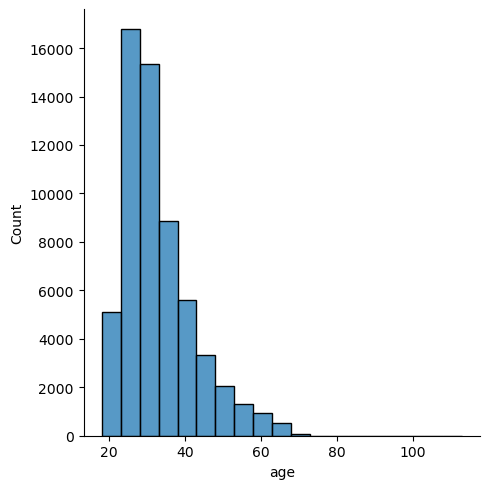

In [9]:
sns.displot(data=profiles, x="age", kind="hist", binwidth = 5);

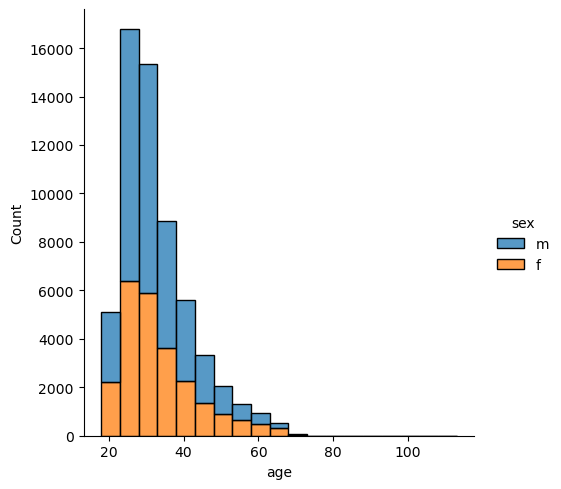

In [10]:
sns.displot(data=profiles, x="age", hue="sex", kind="hist", binwidth = 5, multiple = "stack");

#### Height

Most people look like they are between 5 and 6.5 feet tall

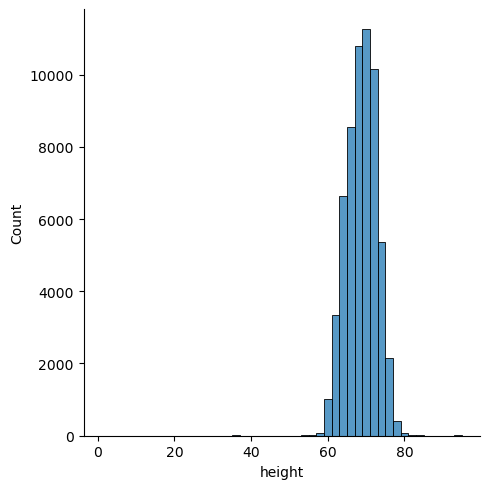

In [11]:
sns.displot(data=profiles, x="height", kind="hist", binwidth=2);

Same chart, broken down by gender.  Females tend to be shorter than males.

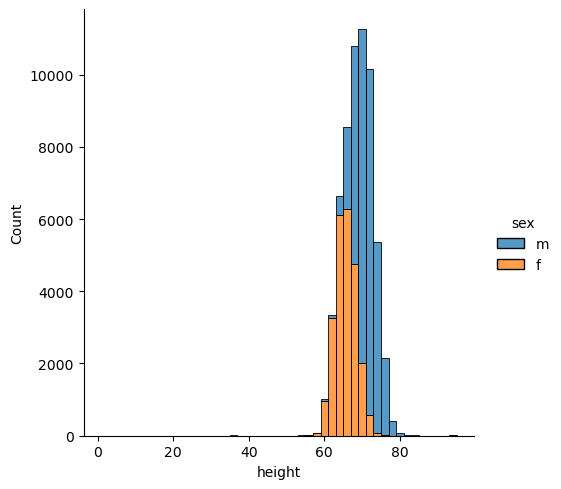

In [12]:
sns.displot(data=profiles, x="height",hue="sex", kind="hist", binwidth = 2, multiple = "stack");

#### Income

It seems that the majority of the participants do not include their income figures.

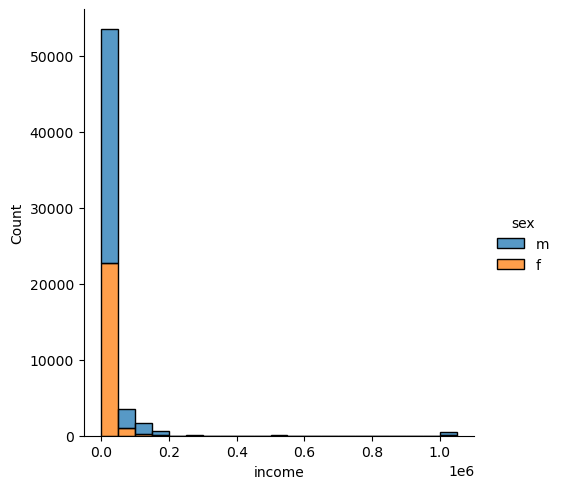

In [13]:
sns.displot(data=profiles, x="income",hue="sex", kind="hist", binwidth = 50000, multiple = "stack");

### Discrete Variables

#### Sex

There are more males in the data, and it seems that there are ~35,000 men to ~25,000 women.

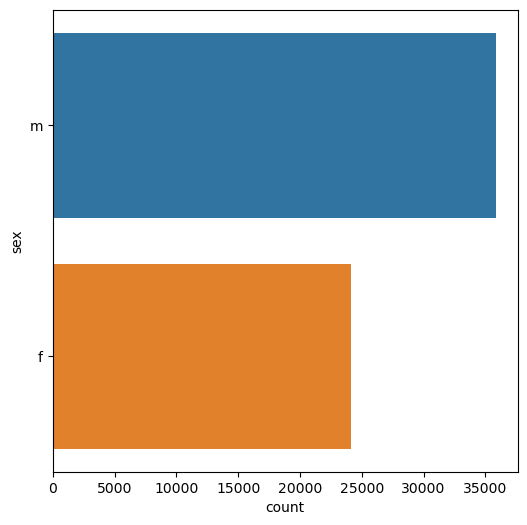

In [14]:
sns.countplot(data=profiles, y="sex");

#### Body Type

It seems that most users will describe themselves as average, fit, or athletic.

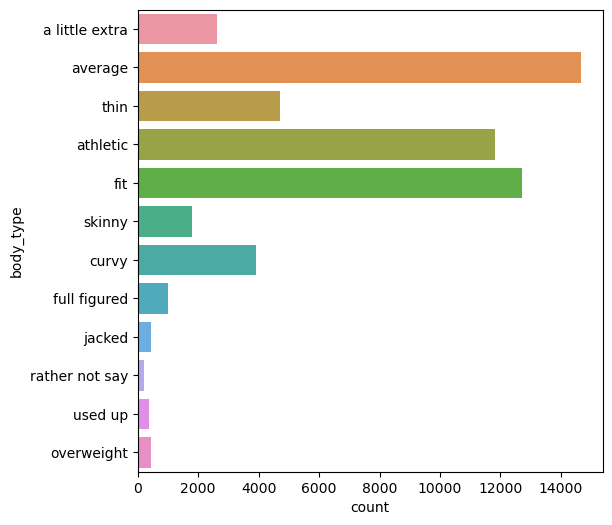

In [15]:
sns.countplot(data=profiles, y="body_type");

Below is the break down of body type by gender and it seems that some of the body type descriptions are highly gendered. For example "curvy" and "full figured" are highly female descriptions, while males use "a little extra", "jacked" and "overweight" more often.

<AxesSubplot:xlabel='count', ylabel='body_type'>

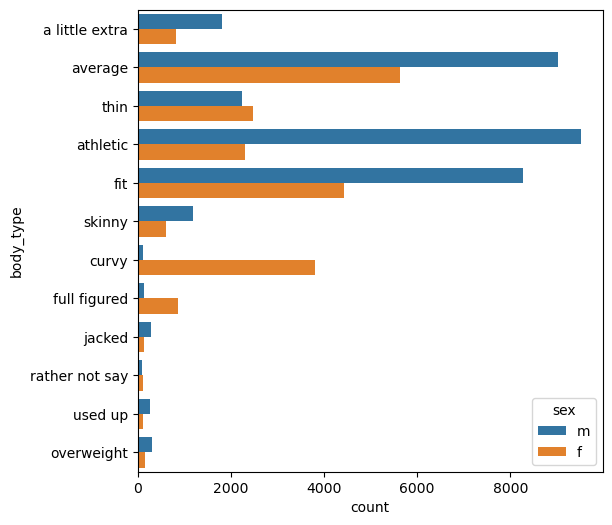

In [16]:
sns.countplot(data=profiles, y="body_type", hue = "sex")

#### Diet

Most users eat "mostly anything", followed by "anything", and "strictly anything".  

Being open-minded seems to be a popular signal to potential partners. It might also be because most users do are not that serious about any particular religion/creed that might prescribe a specific diet

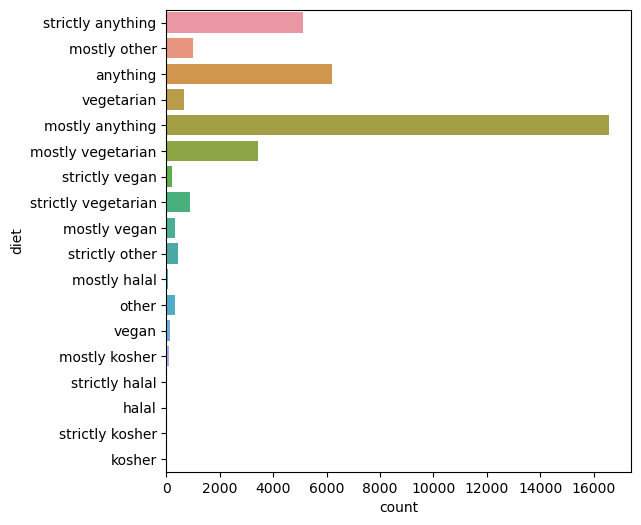

In [17]:
sns.countplot(data=profiles, y="diet");

#### Drinks

The majority of the users drink "socially", then "rarely" and "often".

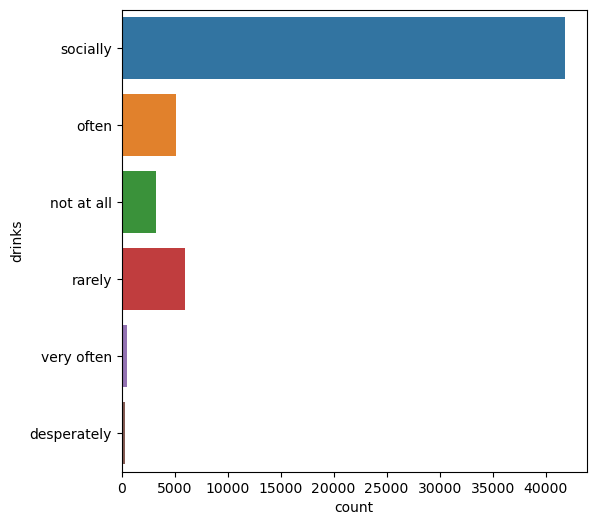

In [18]:
sns.countplot(data=profiles, y="drinks");

#### Drugs

The vast majority of users "never" use drugs.

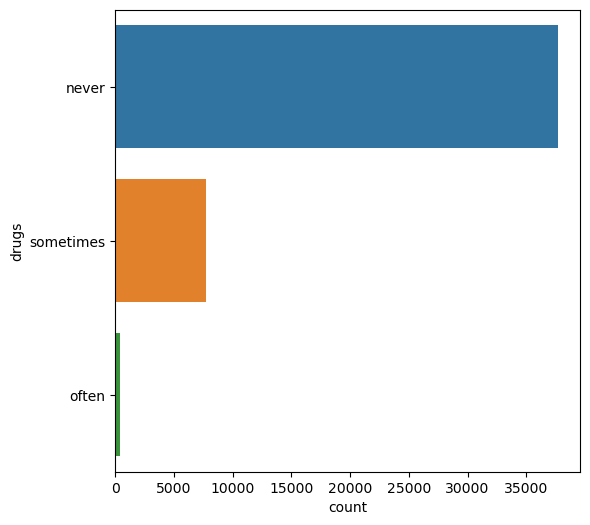

In [19]:
sns.countplot(data=profiles, y="drugs");

#### Education

Below you can see the majority of users are graduate from college/university followed by masters programs and those working on college/university. Interestingly, space camp related options are fairly popular.

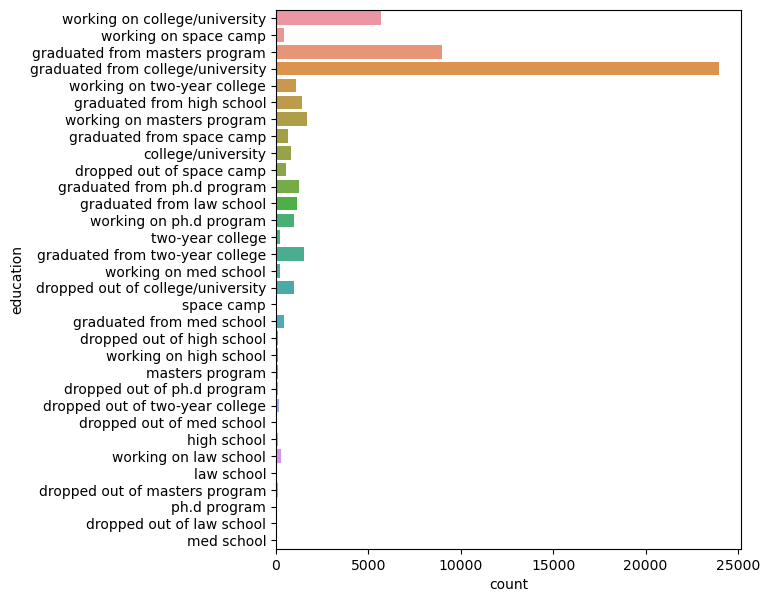

In [20]:
plt.figure(figsize=(6,7))

sns.countplot(data=profiles, y="education");

#### Ethnicity

After attempting to clean up the ethnicity, it appears that most of the users are white, with the next largest being Asian

<AxesSubplot:xlabel='count', ylabel='ethnicity_cleaned'>

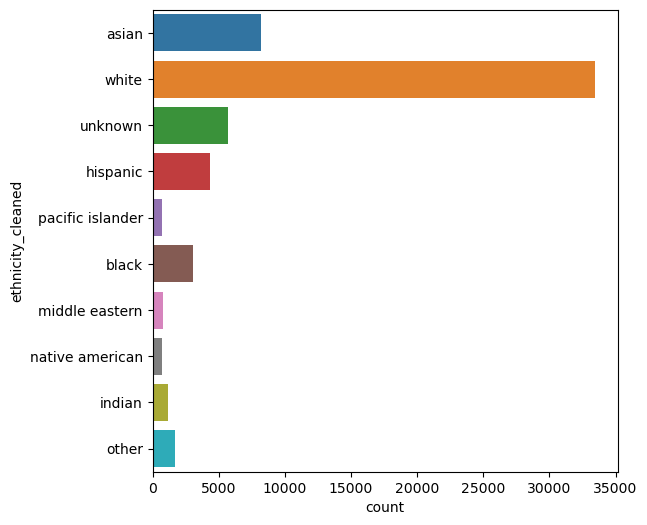

In [21]:
def get_ethnicity_cleaned(ethn_string):
    if ethn_string.startswith('black'):
        return 'black'
    elif ethn_string.startswith('native american'):
        return 'native american'
    elif ethn_string.startswith('middle eastern'):
        return 'middle eastern'
    elif ethn_string.startswith('pacific'):
        return 'pacific islander'
    elif ethn_string.startswith('indian'):
        return 'indian'
    elif ethn_string.startswith('hispanic'):
        return 'hispanic'
    elif ethn_string.startswith('asian'):
        return 'asian'
    elif ethn_string.startswith('other'):
        return 'other'
    elif ethn_string.startswith('white'):
        return 'white'
    else:
        return 'unknown'

profiles['ethnicity'] = profiles['ethnicity'].fillna('unknown')
profiles['ethnicity_cleaned'] = profiles['ethnicity'].apply(get_ethnicity_cleaned)

sns.countplot(data=profiles, y="ethnicity_cleaned")

#### Jobs

Quite a few users don't fit into the categories provided, but there are a fair share of students, artists, tech, and business folks.

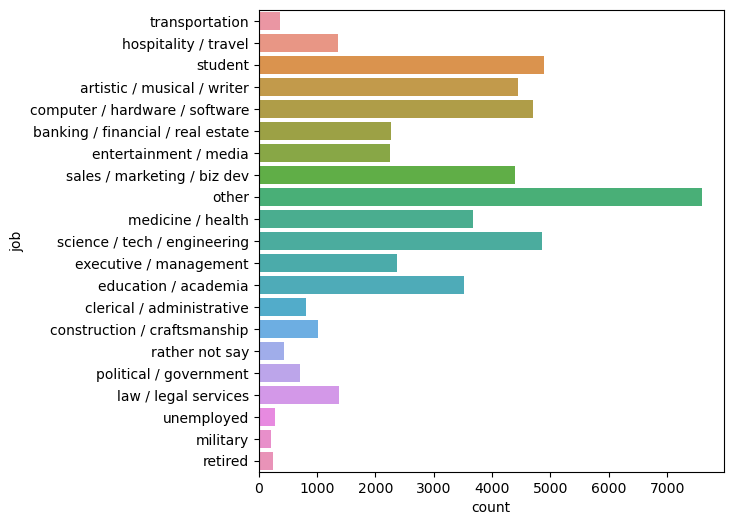

In [22]:
sns.countplot(data=profiles, y="job");

#### Offspring

Most users seem not to have kids.

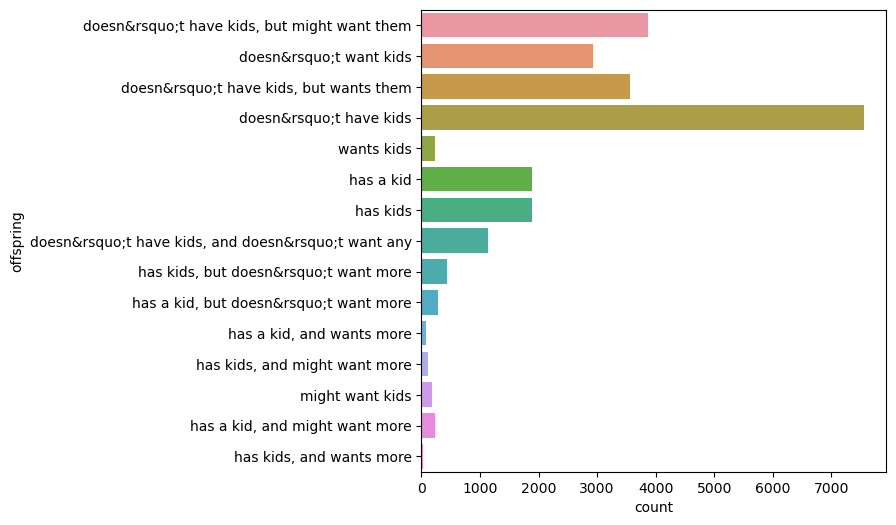

In [23]:
sns.countplot(data=profiles, y="offspring");

#### Orientation

The majority of users are straight.  Interestingly, the majority of bisexual users are female.

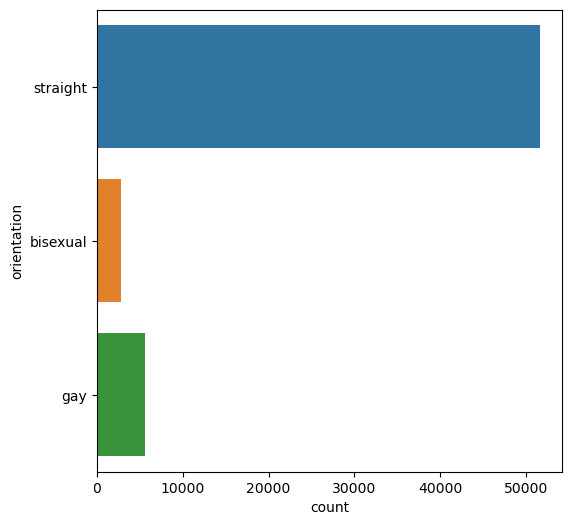

In [24]:
sns.countplot(data=profiles, y="orientation");

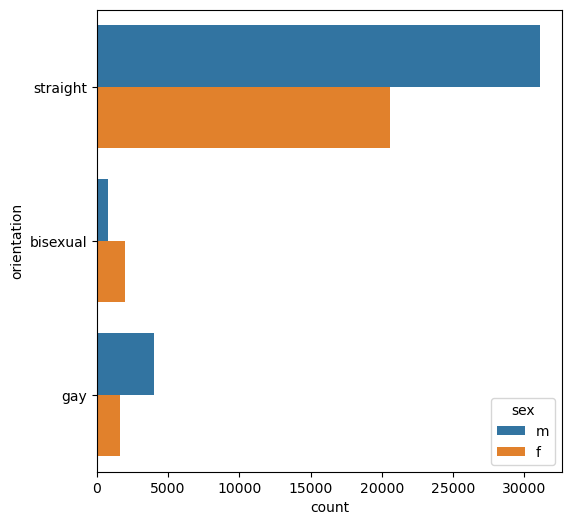

In [25]:
sns.countplot(data=profiles, y="orientation", hue="sex");

#### Pets

It seems that most users like or have dogs.

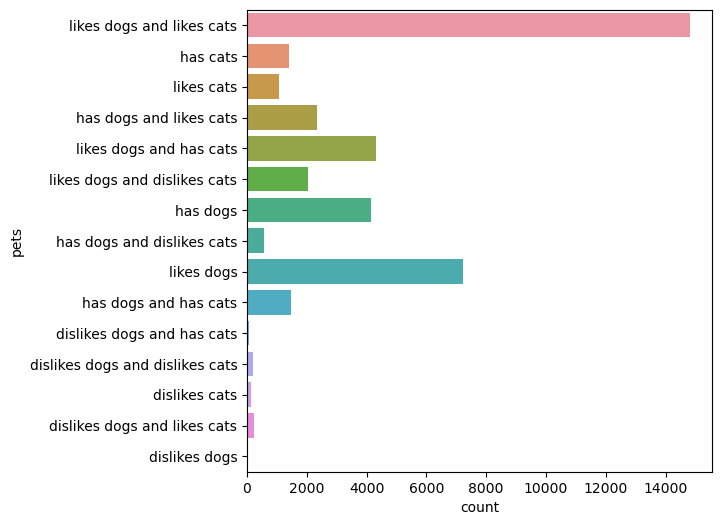

In [26]:
sns.countplot(data=profiles, y="pets");

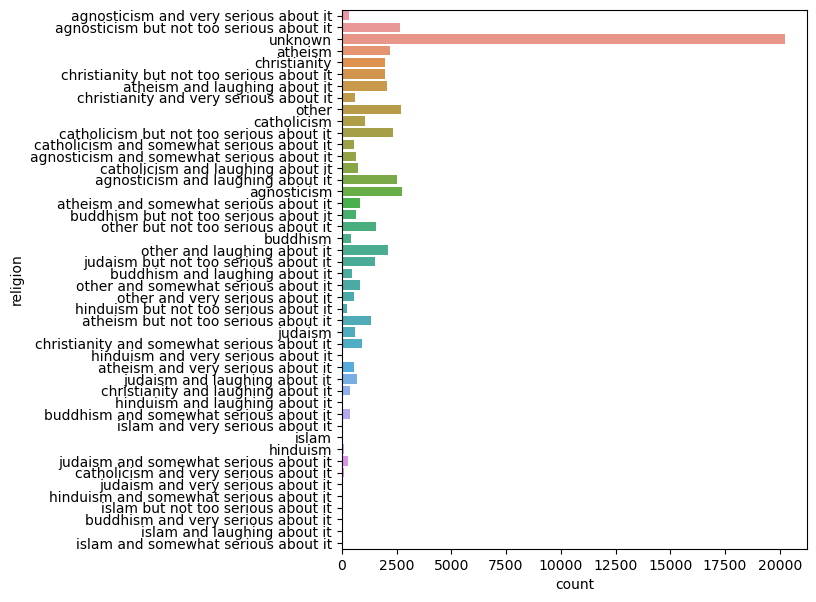

In [27]:
plt.figure(figsize=(6,7))
sns.countplot(data=profiles, y="religion");

After cleaning the religion by taking the first word and distilling down to groups, the majority was not very religious, identifying as agnostic, other, or atheists.

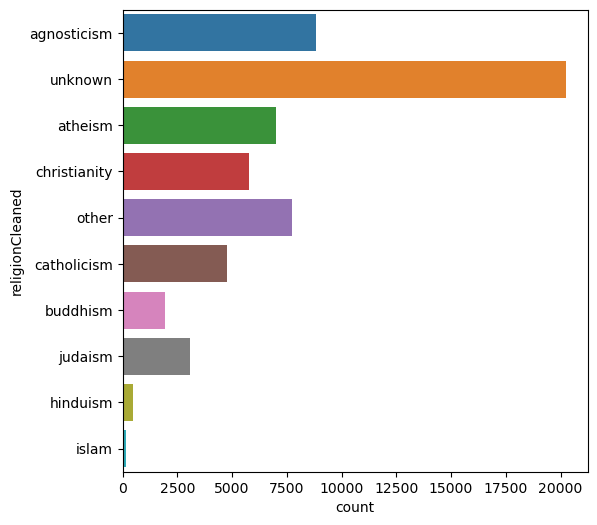

In [28]:
profiles['religionCleaned'] = profiles.religion.str.split().str.get(0)
sns.countplot(data=profiles, y="religionCleaned");

#### Signs

Astrological signs of the users are mainly evenly distributed with Capricorns being the rarest and Leos being the most common.

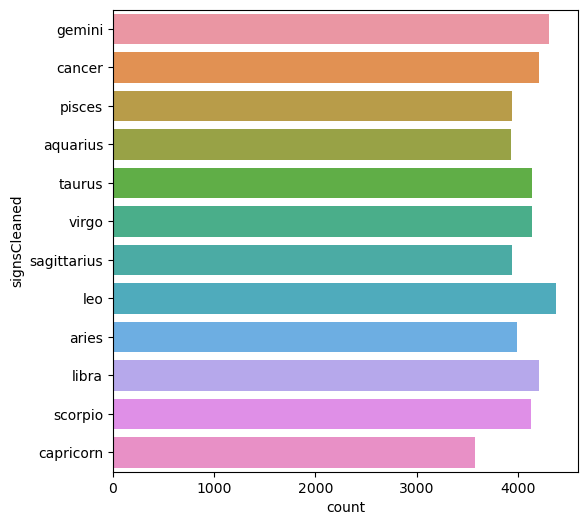

In [29]:
profiles['signsCleaned'] = profiles.sign.str.split().str.get(0)
sns.countplot(data=profiles, y="signsCleaned");

#### Smoking

Majority of users chose "no" for smoking

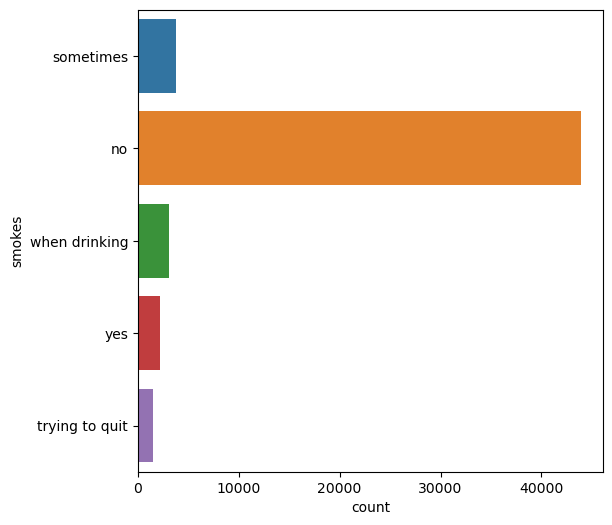

In [30]:
sns.countplot(data=profiles, y="smokes");

#### Status

The relationship status for a dating website is fairly predictable. One would assume that most people are single and available which is reflected in the data.

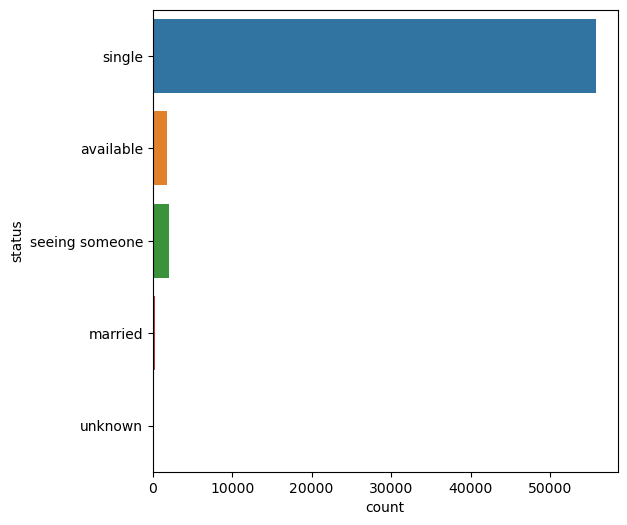

In [31]:
sns.countplot(data=profiles, y="status");

### Data Preparation

#### Missing Data

Missing data is often not handled by machine learning algorithms well and have to be checked so they may need to be imputed or removed. It seems that many of the columns do have missing values.

In [32]:
profiles.isnull().sum()

age                          0
body_type                 5296
diet                     24395
drinks                    2985
drugs                    14080
education                 6628
essay0                    5488
essay1                    7572
essay2                    9638
essay3                   11476
essay4                   10537
essay5                   10850
essay6                   13771
essay7                   12451
essay8                   19225
essay9                   12603
ethnicity                    0
height                       3
income                       0
job                       8198
last_online                  0
location                     0
offspring                35561
orientation                  0
pets                     19921
religion                     0
sex                          0
sign                     11056
smokes                    5512
speaks                      50
status                       0
religious_code               0
religiou

#### Preprocessing 

Preparing the data for modeling can speed up the process and produce better models. As the adage goes, "garbage in garbage out" so we want to make sure the data we are inputing into our modelling step is good enough to share with others.

The data for the model is going to be a subset of the variables. The variables were selected because they might be a good predictor for religious adherence, where some of the variables that were not selected such as age is probably not a good indicator.

Most of these columns have quite a few missing values, so we are going to fill them in and then encode the categorical values for our model.

In [33]:
cols = ['diet', 'drinks', 'drugs', 'education', 'ethnicity_cleaned',
        'offspring',
        'orientation', 'pets', 'sex', 
        'smokes', 'status']
profiles[cols].isna().sum()

diet                 24395
drinks                2985
drugs                14080
education             6628
ethnicity_cleaned        0
offspring            35561
orientation              0
pets                 19921
sex                      0
smokes                5512
status                   0
dtype: int64

In [34]:
# diet_code
def get_diet(diet_str):
    if diet_str == 'unknown':
        return -1
    elif 'anything' in diet_str:
        return 0
    elif 'vegetarian' in diet_str:
        return 1
    elif 'vegan' in diet_str:
        return 2
    elif 'kosher' in diet_str:
        return 3
    elif 'halal' in diet_str:
        return 4
    elif 'other' in diet_str:
        return 5
profiles['diet'] = profiles['diet'].fillna('unknown')
profiles['diet_code'] = profiles['diet'].apply(get_diet)

In [35]:
# drinks_code
drinks_map = {'unknown': -1, 'not at all': 0, 'rarely':  1,
              'socially': 2, 'often': 3, 'very often': 4,
             'desperately': 5}
profiles['drinks_code'] = profiles['drinks'].fillna('unknown').map(drinks_map)

In [36]:
# drugs_code
drugs_map = {'unknown': -1, 'never': 0,
             'sometimes':  1, 'often': 2}
profiles['drugs_code'] = profiles['drugs'].fillna('unknown').map(drugs_map)

In [37]:
# education_code
education_map = {'unknown': -1, 'working on space camp': -1, 'graduated from space camp': -1,
                'dropped out of space camp': -1, 'space camp': -1,
                 'dropped out of high school': 0,
                'working on high school': 0, 'high school': 1, 'graduated from high school': 1,
                'dropped out of two-year college': 1, 'working on two-year college': 1,
                'two-year college': 2, 'graduated from two-year college': 2, 
                'dropped out of college/university': 2, 'working on college/university': 2,
                'college/university': 3, 'graduated from college/university': 3,
                'dropped out of masters program': 3, 'working on masters program': 3,
                'masters program': 4, 'graduated from masters program': 4,
                'dropped out of ph.d program': 4, 'working on ph.d program': 4,
                'ph.d program': 5, 'graduated from ph.d program': 5,
                'dropped out of law school': 4, 'working on law school': 4,
                'law school': 6, 'graduated from law school': 6,
                'dropped out of med school': 4, 'working on med school': 4,
                'med school': 7, 'graduated from med school': 7}
profiles['education_code'] = profiles['education'].fillna('unknown').map(education_map)

In [38]:
# ethnicity_code
ethnicity_map = {'unknown': -1, 'white': 1, 'asian':2, 'hispanic':3, 
                 'black':4, 'other':5, 'pacific islander':6, 'indian':7, 
                 'native american':8, 'middle eastern':9}
profiles['ethnicity_code'] = profiles['ethnicity_cleaned'].map(ethnicity_map)

In [39]:
# has_kids and wants_kids
def get_offspring(offspring_str):
    offspring_map = {'unknown': -1, 'doesn&rsquo;t have kids': 0,
                    'has a kid': 1, 'has kids': 2}
    if ',' not in offspring_str:
        if offspring_str in offspring_map:
            kids = offspring_str
        else:
            kids = 'unknown'
    else:
        kids = offspring_str.split(',', 1)[0]
    return offspring_map[kids]

def get_wants_kids(offspring_str):
    offspring_map = {'unknown': -1, 'and doesn&rsquo;t want any': 0,
                     'but doesn&rsquo;t want more': 0, 'doesn&rsquo;t want kids': 0,
                     'might want kids': 1, 'but might want them': 1,
                     'and might want more': 1, 'wants kids': 2,
                     'but wants them': 2, 'and wants more': 2}
    if ',' not in offspring_str:
        if offspring_str in offspring_map:
            kids = offspring_str
        else:
            kids = 'unknown'
    else:
        kids = offspring_str.split(', ', 1)[1]
    return offspring_map[kids]

profiles['offspring'] = profiles['offspring'].fillna('unknown')
profiles['has_kids'] = profiles['offspring'].apply(get_offspring)
profiles['wants_kids'] = profiles['offspring'].apply(get_wants_kids)

In [40]:
# orientation_code
orientation_map = {'straight': -1, 'bisexual': 0, 'gay': 1}
profiles['orientation_code'] = profiles['orientation'].map(orientation_map)

In [41]:
# cats_code and dogs_code
def get_cats_preference(pets_str):
    preference_map = {'dislikes': 0, 'likes': 1, 'has': 2}
    if 'cats' not in pets_str:
        preference_code = -1
    else:
        if 'and' in pets_str:
            pets_str = pets_str.split('and ', 1)[1]
        preference = pets_str.split(' ', 1)[0]
        preference_code = preference_map[preference]
    return preference_code
def get_dogs_preference(pets_str):
    preference_map = {'dislikes': 0, 'likes': 1, 'has': 2}
    if 'dogs' not in pets_str:
        preference_code = -1
    else:
        if 'and' in pets_str:
            pets_str = pets_str.split(' and', 1)[0]
        preference = pets_str.split(' ', 1)[0]
        preference_code = preference_map[preference]
    return preference_code

profiles['pets'] = profiles['pets'].fillna('unknown')
profiles['cats_code'] = profiles['pets'].apply(get_cats_preference)
profiles['dogs_code'] = profiles['pets'].apply(get_dogs_preference)


In [42]:
# sex_code
sex_map = {'m': 0, 'f': 1}
profiles['sex_code'] = profiles['sex'].map(sex_map)

In [43]:
# smokes_code
smokes_map = {'unknown': -1, 'no': 0, 'trying to quit':  1,
              'sometimes': 2, 'when drinking': 3, 'yes': 4}
profiles['smokes_code'] = profiles['smokes'].fillna('unknown').map(smokes_map)

In [44]:
# status_code
status_map = {'unknown': -1, 'single': 1, 'available': 2, 'seeing someone': 3, 'married': 4}
profiles['status_code'] = profiles['status'].map(status_map)

In [45]:
cols = ['age', 'diet_code', 'drinks_code', 'drugs_code', 'education_code', 
        'ethnicity_code', 'has_kids', 'wants_kids',
        'orientation_code', 'cats_code', 'dogs_code', 'religious_code',
        'sex_code', 'smokes_code', 'status_code', 
        'religious_seriousness']
data = profiles[cols]

#### Splitting Data

Next the data needs to be split into train and validation sets. In this split 25% of the data is reserved for the final validation, while 75% is kept for training the model. 

In [46]:
from sklearn.preprocessing import MinMaxScaler

#Y is the target column, X has the rest
feature_data = data.drop('religious_seriousness', axis=1)
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(feature_data.values)

Y = data.religious_seriousness

In [47]:
#Validation chunk size
val_size = 0.25

#Split the data into chunks
from sklearn.model_selection import train_test_split 
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=val_size, random_state = 0)

#turn in to 1d arrays
Y_train = Y_train.to_numpy().ravel()
Y_val = Y_val.to_numpy().ravel()

### Prediction

#### Models 

For this project three common algorithms will be used to make predictions. 

Below, the respective modules for Logistic Regression, Decision Trees, and KNN are loaded.

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Logistic Regression

The first model is using logistic regression with the `multi_class="multinomial"` argument. Using `lr_model` predictions are created from the training dataset which is used to figure out how well the model preformed.

In [49]:
lr_model = LogisticRegression(multi_class="multinomial").fit(X_train, Y_train)
lr_predictions = lr_model.predict(X_train)

The final accuracy of the logistic regression model is 57% which is better than randomly guessing, which would result in being correct ~17% of the time (1/6).

In [50]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, lr_predictions))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     15090
           0       0.33      0.21      0.26      6766
           1       0.35      0.54      0.42      9181
           2       0.38      0.49      0.43      8826
           3       0.24      0.00      0.00      3431
           4       0.31      0.00      0.01      1665

    accuracy                           0.57     44959
   macro avg       0.44      0.37      0.35     44959
weighted avg       0.56      0.57      0.55     44959



#### K Nearest Neighbor

The next model is the KNeighborsClassifier which will use a data point's nearest neighbors to predict the signs. The default value of 5 for n_neighbors was kept. This number can be tuned later on if needed. This model had a 66% accuracy which is a good sign.

In [51]:
knn_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_train)

In [52]:
print(classification_report(Y_train, knn_predictions))

              precision    recall  f1-score   support

          -1       0.83      0.99      0.90     15090
           0       0.50      0.55      0.53      6766
           1       0.55      0.65      0.59      9181
           2       0.58      0.48      0.53      8826
           3       0.51      0.16      0.25      3431
           4       0.50      0.10      0.17      1665

    accuracy                           0.66     44959
   macro avg       0.58      0.49      0.49     44959
weighted avg       0.64      0.66      0.63     44959



### Decision Trees

The last model is the decision tree. The default max_depth is `None` which means that "nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples". The results are very promising because it has a 99% accuracy with this model.

In [53]:
cart_model = DecisionTreeClassifier().fit(X_train, Y_train) 
cart_predictions = cart_model.predict(X_train) 

In [54]:
print(classification_report(Y_train, cart_predictions))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     15090
           0       0.97      1.00      0.99      6766
           1       0.98      0.99      0.98      9181
           2       0.99      0.98      0.98      8826
           3       1.00      0.97      0.99      3431
           4       1.00      0.98      0.99      1665

    accuracy                           0.99     44959
   macro avg       0.99      0.99      0.99     44959
weighted avg       0.99      0.99      0.99     44959



Below is a confusion matrix of the results with the true values on the y axis and predicted values along the x axis. Since the diagonals are lighter in color and have higher numbers, the accuracy is going to be high since those are the True Positives.

In [55]:
from sklearn.metrics import confusion_matrix 
cart_cm = confusion_matrix(Y_train, cart_predictions)
cart_labels = cart_model.classes_

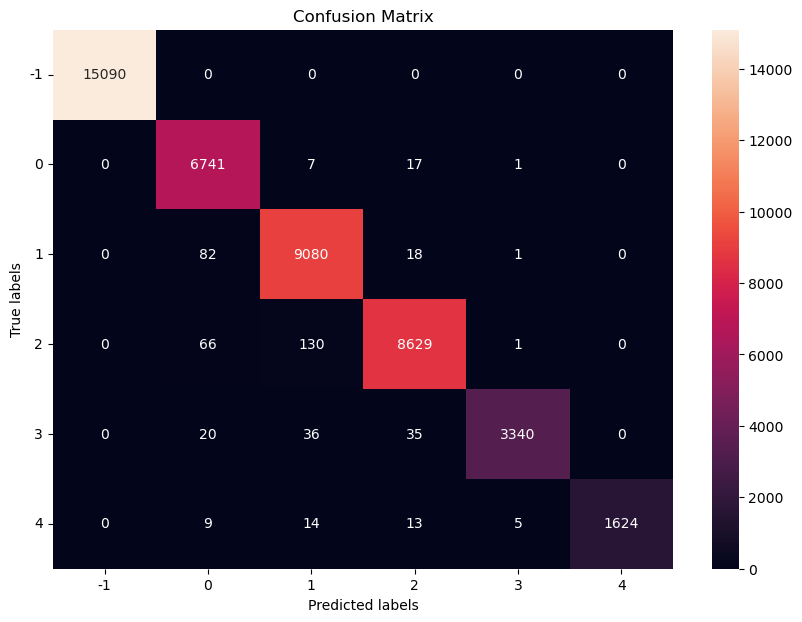

In [56]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cart_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params()

ax.xaxis.set_ticklabels(cart_labels); 
ax.yaxis.set_ticklabels(cart_labels);

Going back to the model, a quick analysis will show that this tree model has a depth of 48 branches, which will probably not generalize to another dataset. In this case this model has been "overfit" for this data.

In [57]:
cart_model.get_depth()

48

To make a point, a five fold cross validation is created with the same data. The results are worse than the KNN and about the same as the Logistic Regression algorithms. The baseline was ~53%.

In [58]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(cart_model, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.53669929 0.53425267 0.53636566 0.53247331 0.52585919]
Baseline: 53.31% (0.39%)


The decision tree model will be made again, but with a `max_depth` of 20 to stop the algorithm from reaching the stopping point. The new accuracy rate of ~84% is worse than the first iteration, but still better than the KNN model.

In [59]:
cart_model20 = DecisionTreeClassifier(max_depth = 20).fit(X_train, Y_train) 
cart_predictions20 = cart_model20.predict(X_train) 

In [60]:
print(classification_report(Y_train, cart_predictions20))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     15090
           0       0.80      0.74      0.77      6766
           1       0.72      0.83      0.77      9181
           2       0.74      0.79      0.77      8826
           3       0.93      0.62      0.75      3431
           4       0.97      0.69      0.80      1665

    accuracy                           0.85     44959
   macro avg       0.86      0.78      0.81     44959
weighted avg       0.85      0.85      0.85     44959



If we check again with cross validation, the new model is still averaging ~55% which is not very good. 

In [61]:
results20 = cross_val_score(cart_model20, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results20)
print("Baseline: %.2f%% (%.2f%%)" % (results20.mean()*100, results.std()*100))

[0.5547153  0.55705071 0.55171263 0.55794039 0.54298743]
Baseline: 55.29% (0.39%)


#### Final Model

So it seems that the `knn_model` might be the best model for OkCupid to use when users don't have their religion listed on their user profile. By using the hold out or validation set, we get ~52% accuracy which is not that great. 

In [62]:
knn_predictionsVal = knn_model.predict(X_val) 
print(classification_report(Y_val, knn_predictionsVal))

              precision    recall  f1-score   support

          -1       0.80      0.96      0.87      5136
           0       0.28      0.30      0.29      2229
           1       0.36      0.42      0.39      3031
           2       0.37      0.30      0.33      2955
           3       0.11      0.04      0.05      1085
           4       0.08      0.01      0.02       551

    accuracy                           0.52     14987
   macro avg       0.33      0.34      0.33     14987
weighted avg       0.47      0.52      0.49     14987



In the confusion matrix, it becomes clear that the scores for the predictions for the different classes followed the frequency of their counts in the pre-split data.  The `somewhat serious` and `very serious` predictions really suffered, most probably because they were not represented much in the data set.

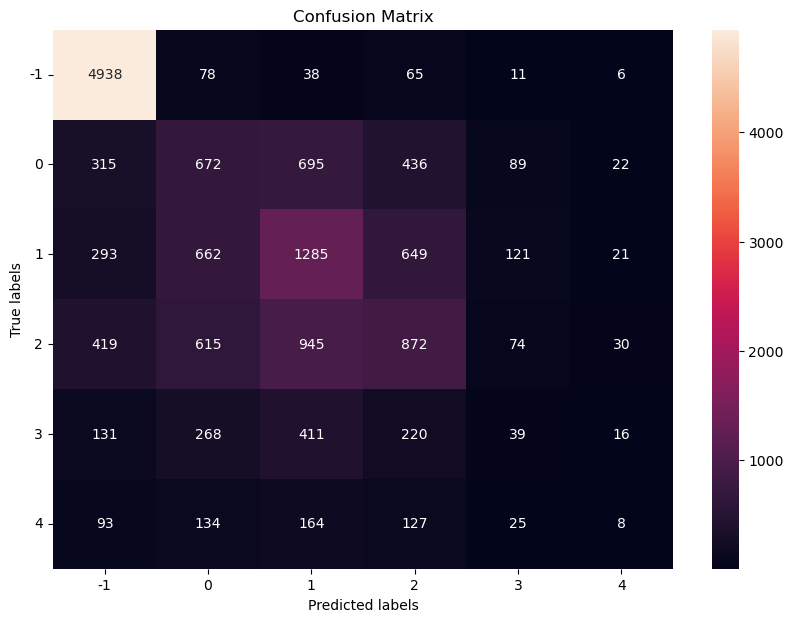

In [63]:
final_cm = confusion_matrix(Y_val, knn_predictionsVal)
knn_labels = knn_model.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(final_cm, annot=True, ax = ax, fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=0)

ax.xaxis.set_ticklabels(knn_labels); 
ax.yaxis.set_ticklabels(knn_labels);

### Conclusion

#### General Comments
In this project machine learning was used to predict the religious commitment of OkCupid users. This is an important feature since many people believe in compatibility along those lines. If users don't input it, an algorithmic solution can in theory generate the religious seriousness to impute missing data when making matches.

The final selected algorithm was able to guess correctly about half the time.

#### Next Steps
Next steps will be to consider how to better predict religious seriousness or if there is a way to do with more data. 

Another possibility is to add additional models or tune the hyper parameters of the used models to see if any more predictive power could be squeezed out of the algorithms.

Also, because the classes were unbalanced, another try using resampling or some other method such as downsampling or upweighting might be worth it.

Finally, analyzing the essay-related data and using a Naive Bayes algorithm might add predictive power to our algorithms.